### <center> Python 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

[hint](https://rstudio-pubs-static.s3.amazonaws.com/105898_ad304ec95f474375af29523d07f64d8d.html)

[work place](https://www.coursera.org/learn/mathematics-and-python/peer/4vN1n/tsientral-naia-priediel-naia-tieoriema-svoimi-rukami)

#### 1. Выберите ваше любимое непрерывное распределение

Возьмем экспоненциальное распределение. Функция используется при x>0.
- [Wiki](https://ru.wikipedia.org/wiki/Распределение_Максвелла/)
- [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)

Функция распределения:
### $$ F(x) = 1 - e^{-\lambda \cdot x} $$

Функция плотности:
### $$ f(x) = \lambda e^{- \lambda \cdot x} $$


В общем случае есть коэффициент $\lambda$, но мы его прировняем к 1.

- Математическое ожидание: $\lambda^{-1} = 1 $
- Среднее значение: $\lambda^{-1} = 1 $
- Медиана: $\frac{ln(2)}{\lambda} = ln(2)$
- Дисперсия: $\lambda^{-2} = 1$
- Среднеквадратичное отклонение: $\lambda^{-1} = 1$

In [42]:
expon = sts.expon #экспонет. распределение
mu = 1  # мат.ожидание
sigma = 1  # СКО 

lam = 1  # параметр передаваемый в теор функцию
scale = 1/lam  # реализация параметра в модуле scipy

___
2. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

array([1.13841099e+00, 1.11023962e+00, 1.46535470e+00, 2.95020438e+00,
       7.69903962e-01, 6.03972900e-01, 1.41904110e+00, 5.52410625e-01,
       2.40807770e+00, 6.08591879e-02, 3.14352627e+00, 1.71278345e+00,
       1.93413099e+00, 6.97708663e-02, 2.14354550e+00, 4.03573610e-01,
       5.23452178e-01, 2.73372750e+00, 1.76885460e+00, 5.97458409e-01,
       4.81594794e-01, 1.05129805e-01, 6.09783175e-01, 9.55814621e-01,
       1.79090730e+00, 1.99861683e-01, 4.68698483e-01, 1.48323475e-01,
       9.85536507e-01, 1.48763776e+00, 6.85135327e-01, 7.80573448e-01,
       4.26379385e-01, 6.74644980e-01, 1.38778458e+00, 4.25472258e-01,
       9.20648271e-02, 1.91017804e+00, 2.36035334e-01, 1.37192566e+00,
       2.95154373e+00, 6.59093455e-01, 3.13351164e+00, 8.11261944e-02,
       2.52754891e-01, 3.55106337e-01, 1.12002456e+00, 4.35400140e-01,
       4.74622832e-01, 1.10124936e+00, 1.92855974e+00, 6.24997211e-01,
       7.13477147e-01, 3.33839516e-01, 4.15245499e-01, 8.22492830e-02,
      

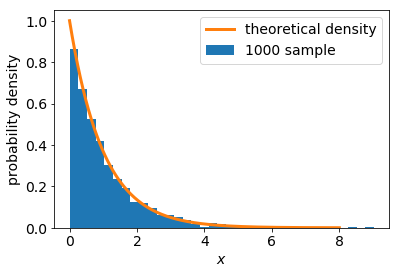

In [66]:
sample = expon.rvs(size=1000, scale=scale)

x = np.linspace(0, 8, 300)

plt.hist(sample, bins=35, density=True, label="1000 sample")  # гистограмма
plt.plot(x, expon.pdf(x, scale=scale), label="theoretical density", linewidth=3)  # теоритическая плотность

plt.ylabel('probability density', fontsize=14)
plt.xlabel('$x$', fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.legend(fontsize=14);

___
3. Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения

In [85]:
work_n = (5, 10, 30, 50, 100, 200)

n = 5

some = np.array([[0]*n for i in range(1000)])

some = np.apply_along_axis(expon.rvs, 0, some)
some

array([[0.13969146, 0.10561398, 0.8684027 , 0.85102985, 0.62032704],
       [4.38434992, 0.51529553, 1.69834654, 1.70986489, 0.16306061],
       [1.73448411, 0.39213375, 0.99072862, 0.53873297, 0.1403291 ],
       ...,
       [0.20741985, 1.51432607, 1.97084199, 2.4954637 , 2.21035717],
       [0.58205503, 0.79561963, 0.50245024, 0.81074566, 1.95004348],
       [0.14062378, 0.8911644 , 1.69647637, 0.05512476, 2.41039715]])